# Mistral OCR (Single)

In [20]:
from mistralai import Mistral
import sys
import os
from pathlib import Path
sys.path.insert(1, str(Path.cwd().parent.parent)) 

from src.fs import write_text_file

In [16]:
from pathlib import Path
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
from mistralai.models import OCRResponse
import json

In [2]:
client = Mistral(api_key=os.environ['MISTRAL_API_KEY'])

## OCR PDF

In [ ]:
def mistral_ocr_pdf(file_path: str):
    """OCR one PDF file"""
    
    pdf_file = Path(file_path)
    if not pdf_file.is_file():
        raise FileNotFoundError(f"The file '{pdf_file}' does not exist.")

    uploaded_file = client.files.upload(
        file={
            "file_name": pdf_file.stem,
            "content": pdf_file.read_bytes(),
        },
        purpose="ocr",
    )

    signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

    pdf_response = client.ocr.process(
        document=DocumentURLChunk(document_url=signed_url.url),
        model="mistral-ocr-latest",
        include_image_base64=True,
    )
    
    return pdf_response


In [11]:
ocr_mistral7b = mistral_ocr_pdf("docs/mistral7b.pdf")

OCRResponse(pages=[OCRPageObject(index=0, markdown='# Mistral 7B \n\nAlbert Q. Jiang, Alexandre Sablayrolles, Arthur Mensch, Chris Bamford, Devendra Singh Chaplot, Diego de las Casas, Florian Bressand, Gianna Lengyel, Guillaume Lample, Lucile Saulnier, Lélio Renard Lavaud, Marie-Anne Lachaux, Pierre Stock, Teven Le Scao, Thibaut Lavril, Thomas Wang, Timothée Lacroix, William El Sayed\n\n![img-0.jpeg](img-0.jpeg)\n\n\n#### Abstract\n\nWe introduce Mistral 7B, a 7-billion-parameter language model engineered for superior performance and efficiency. Mistral 7B outperforms the best open 13B model (Llama 2) across all evaluated benchmarks, and the best released 34B model (Llama 1) in reasoning, mathematics, and code generation. Our model leverages grouped-query attention (GQA) for faster inference, coupled with sliding window attention (SWA) to effectively handle sequences of arbitrary length with a reduced inference cost. We also provide a model fine-tuned to follow instructions, Mistral 7B
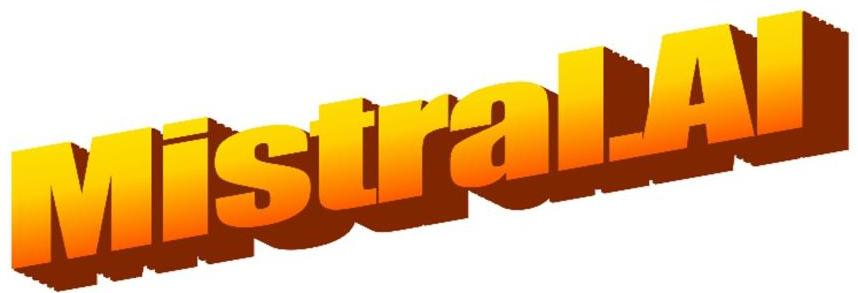
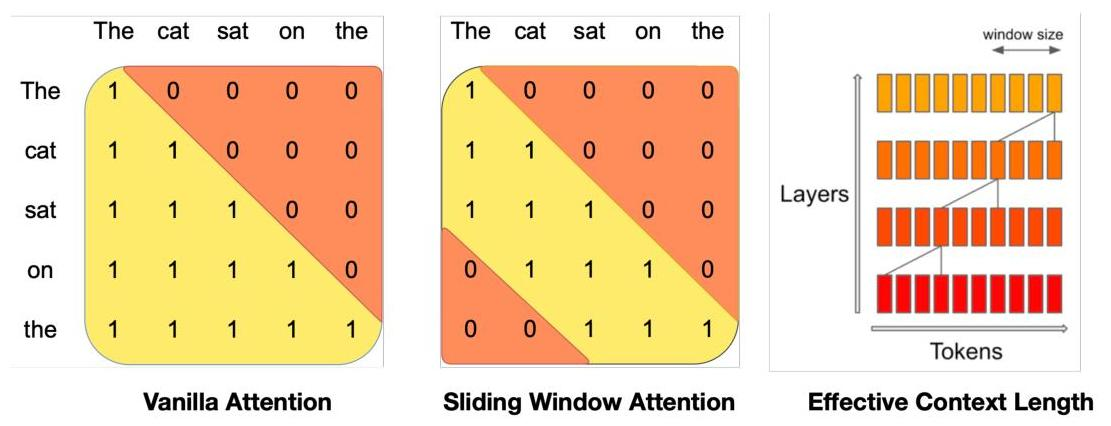
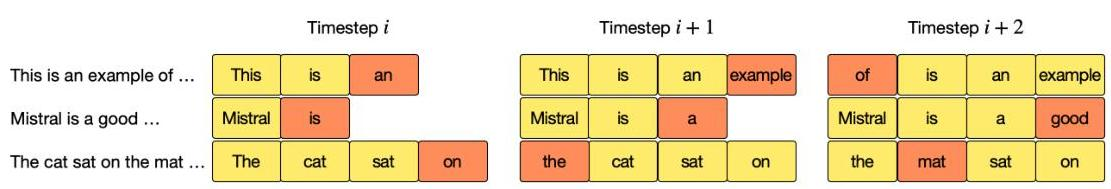
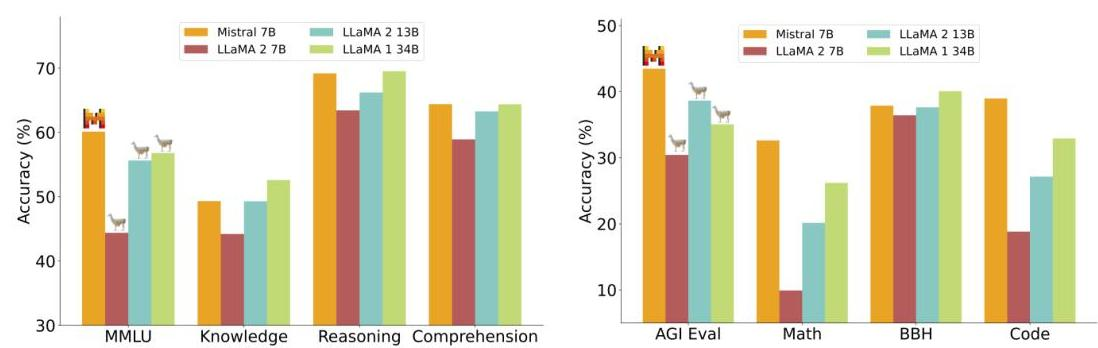
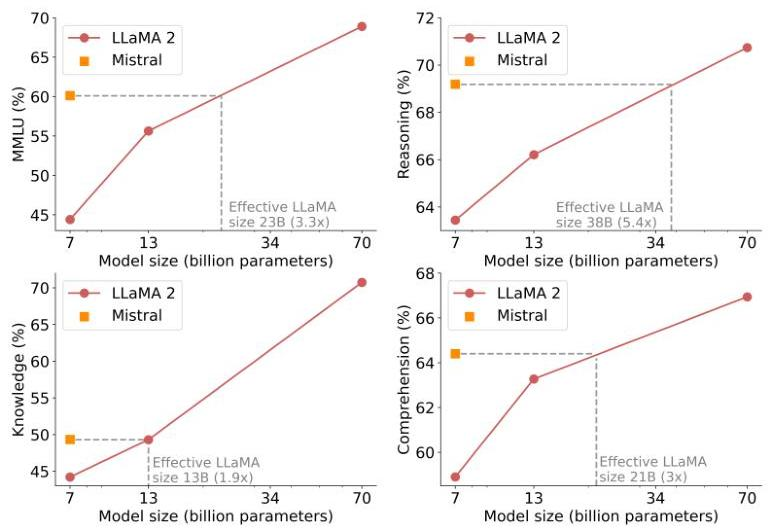
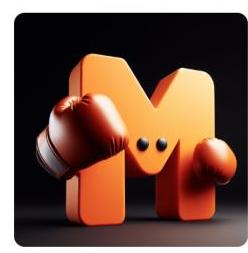

In [12]:
ocr_mistral7b

## Get Markdown (No Image)

In [17]:
def get_mistral_ocr_markdown(ocr_response: OCRResponse):
    return "\n\n".join([page.markdown for page in ocr_response.pages])

In [19]:
md_mistral7b_textonly = get_mistral_ocr_markdown(ocr_mistral7b)

In [21]:
write_text_file(md_mistral7b_textonly, "out/mistral7b-text-only.md")

Text successfully written to out/mistral7b-text-only.md.


### Howto

[OCRPageObject(index=0, markdown='# Mistral 7B \n\nAlbert Q. Jiang, Alexandre Sablayrolles, Arthur Mensch, Chris Bamford, Devendra Singh Chaplot, Diego de las Casas, Florian Bressand, Gianna Lengyel, Guillaume Lample, Lucile Saulnier, Lélio Renard Lavaud, Marie-Anne Lachaux, Pierre Stock, Teven Le Scao, Thibaut Lavril, Thomas Wang, Timothée Lacroix, William El Sayed\n\n![img-0.jpeg](img-0.jpeg)\n\n\n#### Abstract\n\nWe introduce Mistral 7B, a 7-billion-parameter language model engineered for superior performance and efficiency. Mistral 7B outperforms the best open 13B model (Llama 2) across all evaluated benchmarks, and the best released 34B model (Llama 1) in reasoning, mathematics, and code generation. Our model leverages grouped-query attention (GQA) for faster inference, coupled with sliding window attention (SWA) to effectively handle sequences of arbitrary length with a reduced inference cost. We also provide a model fine-tuned to follow instructions, Mistral 7B - Instruct, that 
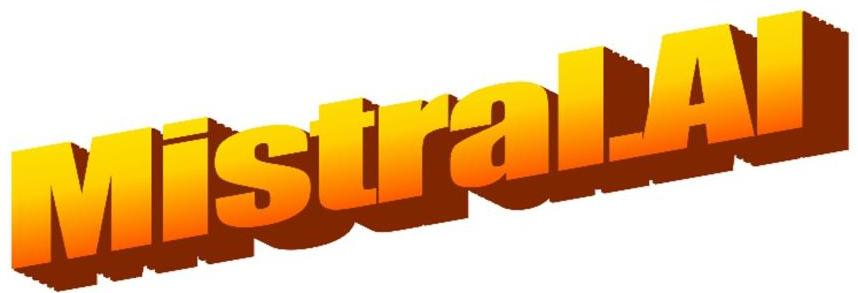
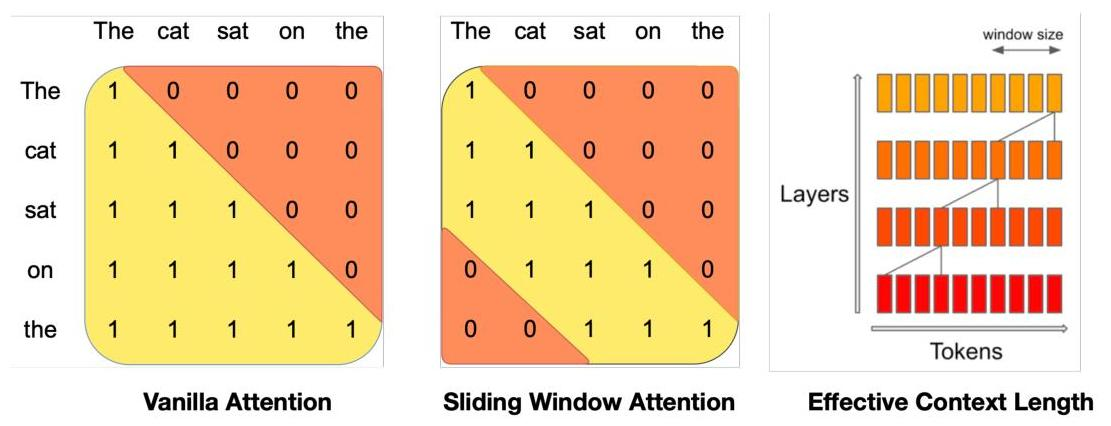
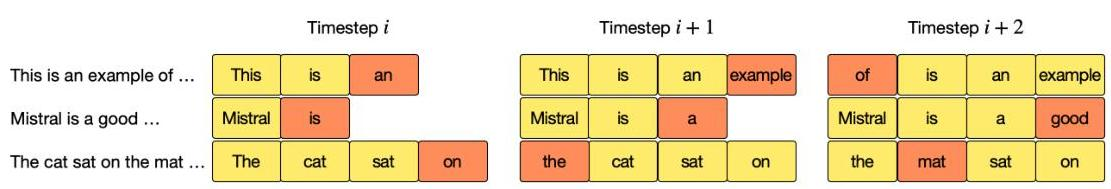
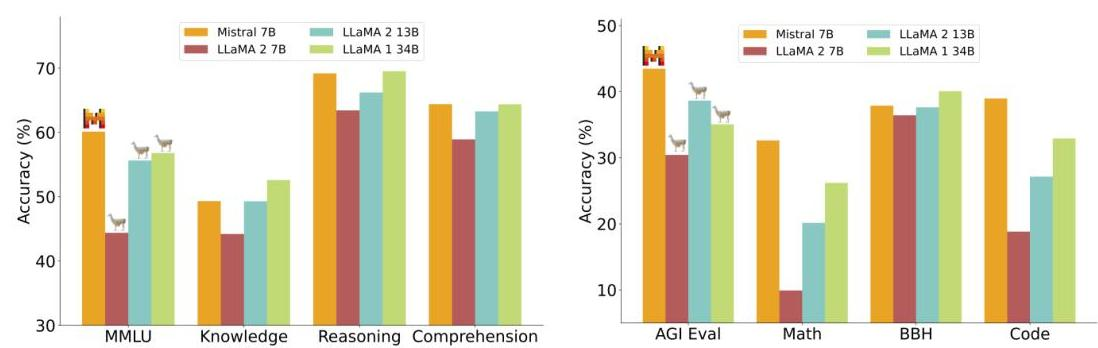
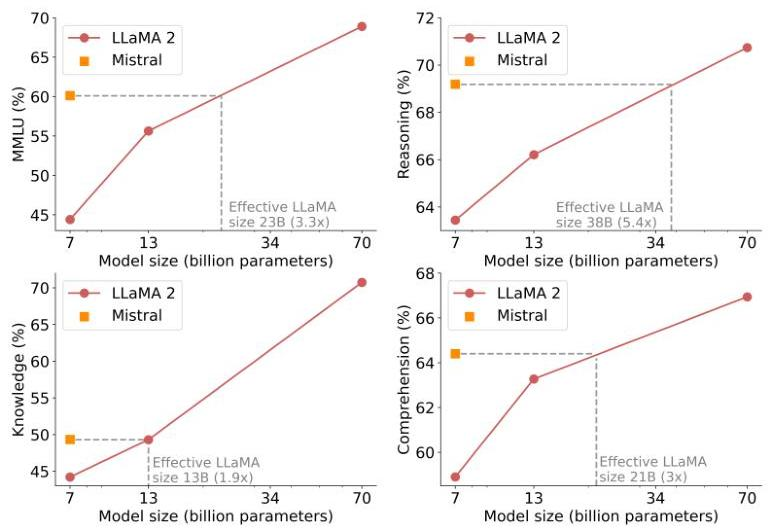
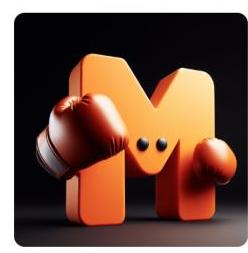

In [ ]:
ocr_mistral7b.pages

In [14]:
ocr_mistral7b.pages[0].markdown

'# Mistral 7B \n\nAlbert Q. Jiang, Alexandre Sablayrolles, Arthur Mensch, Chris Bamford, Devendra Singh Chaplot, Diego de las Casas, Florian Bressand, Gianna Lengyel, Guillaume Lample, Lucile Saulnier, Lélio Renard Lavaud, Marie-Anne Lachaux, Pierre Stock, Teven Le Scao, Thibaut Lavril, Thomas Wang, Timothée Lacroix, William El Sayed\n\n![img-0.jpeg](img-0.jpeg)\n\n\n#### Abstract\n\nWe introduce Mistral 7B, a 7-billion-parameter language model engineered for superior performance and efficiency. Mistral 7B outperforms the best open 13B model (Llama 2) across all evaluated benchmarks, and the best released 34B model (Llama 1) in reasoning, mathematics, and code generation. Our model leverages grouped-query attention (GQA) for faster inference, coupled with sliding window attention (SWA) to effectively handle sequences of arbitrary length with a reduced inference cost. We also provide a model fine-tuned to follow instructions, Mistral 7B - Instruct, that surpasses Llama 2 13B - chat mode

## Get Markdown (Interleaved Image)

In [22]:
def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})")
    return markdown_str

In [28]:
def get_mistral_ocr_markdown_plus_img(ocr_response: OCRResponse):
    markdowns: list[str] = []
    for page in ocr_response.pages:
        image_data = {}
        for img in page.images:
            image_data[img.id] = img.image_base64
        markdowns.append(replace_images_in_markdown(page.markdown, image_data))
    return "\n\n".join(markdowns)


In [29]:
md_mistral7b_inline_img = get_mistral_ocr_markdown_plus_img(ocr_mistral7b)

In [30]:
write_text_file(md_mistral7b_inline_img, "out/mistral7b-with-img.md")

Text successfully written to out/mistral7b-with-img.md.
